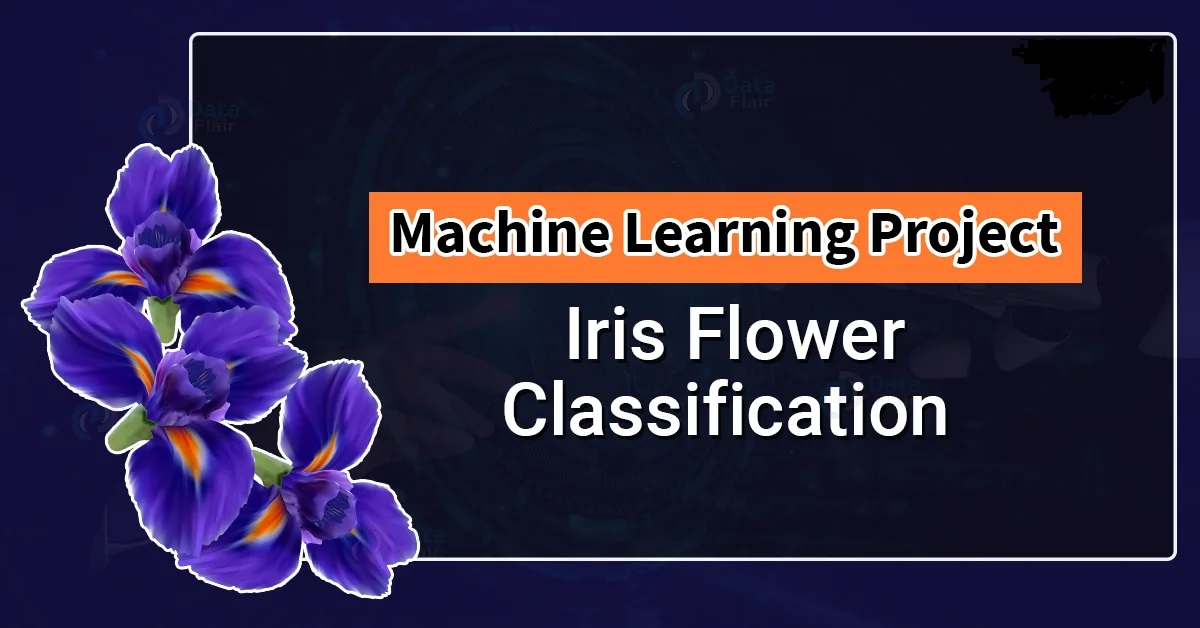

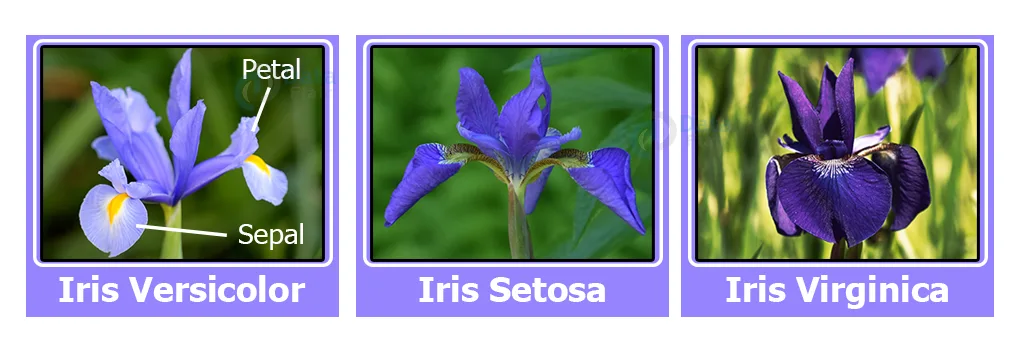

<h2>Importing Required Modules</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

<h3>Importing Dataset</h3>

In [2]:
iris_df = pd.read_csv('datasets/Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
print("Species Counts")
iris_df["Species"].value_counts()

Species Counts


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<h3>Visualizing The Dataset</h3>

In [7]:
#Correlation
corr_ = iris_df.corr()
corr_

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

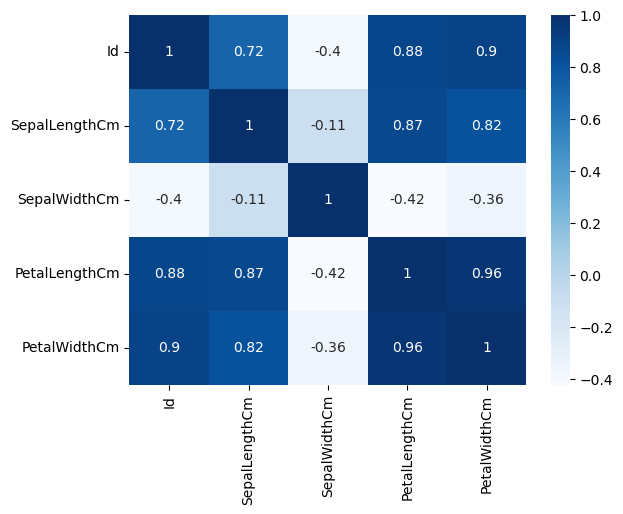

In [8]:
sns.heatmap(corr_, cmap="Blues", annot=True)

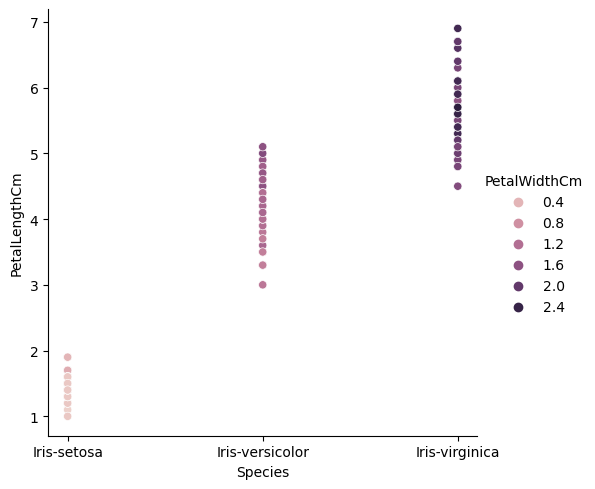

In [9]:
sns.relplot(x = "Species", y = "PetalLengthCm",hue = "PetalWidthCm", data = iris_df)
plt.show()

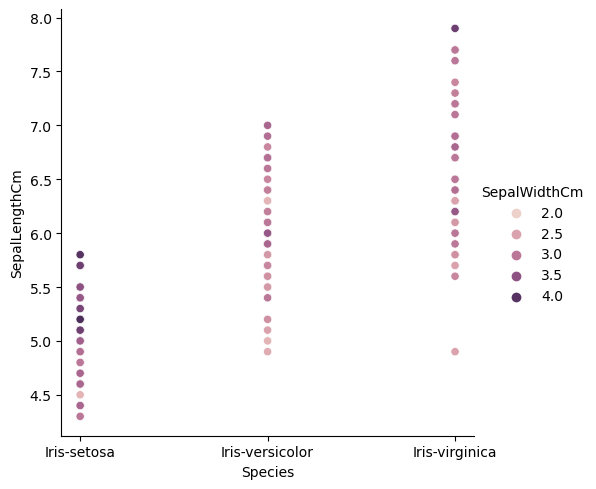

In [10]:
sns.relplot(x = "Species", y = "SepalLengthCm", hue = "SepalWidthCm", data = iris_df)
plt.show()

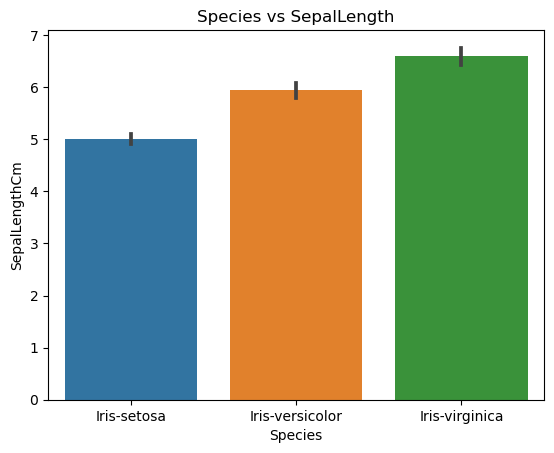

In [11]:
sns.barplot(x = "Species", y = "SepalLengthCm", data=iris_df)
plt.title("Species vs SepalLength")
plt.show()

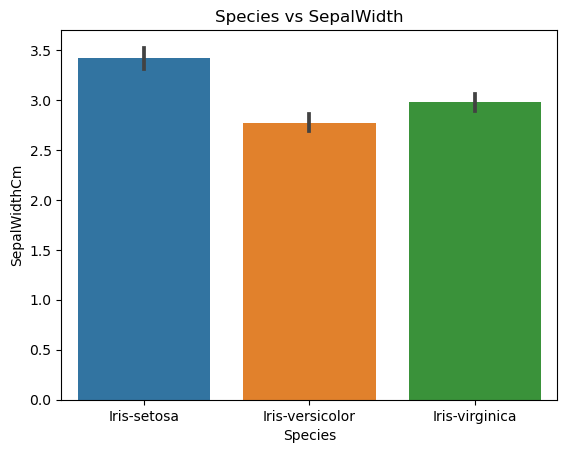

In [12]:
sns.barplot(x = "Species", y = "SepalWidthCm", data=iris_df)
plt.title("Species vs SepalWidth")
plt.show()

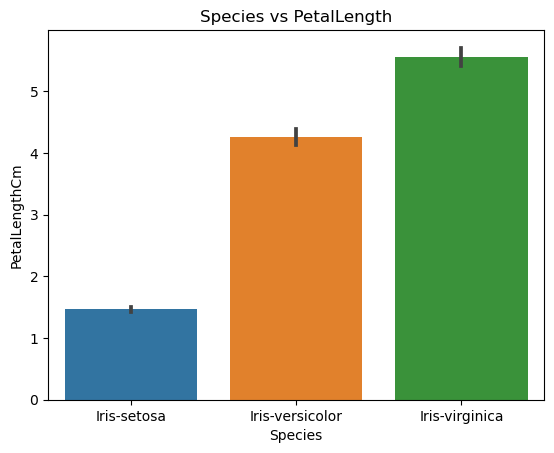

In [13]:
sns.barplot(x = "Species", y = "PetalLengthCm", data=iris_df)
plt.title("Species vs PetalLength")
plt.show()

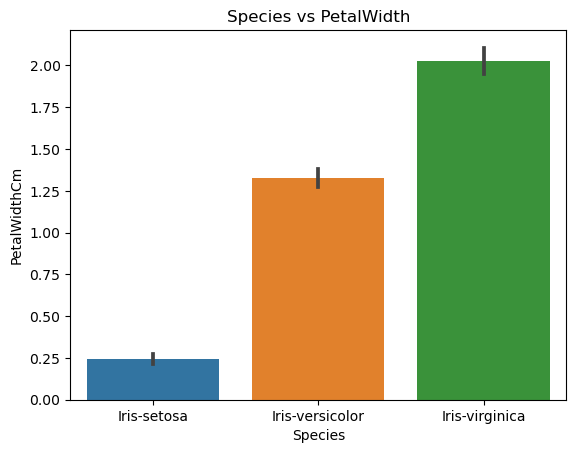

In [14]:
sns.barplot(x = "Species", y = "PetalWidthCm", data=iris_df)
plt.title("Species vs PetalWidth")
plt.show()

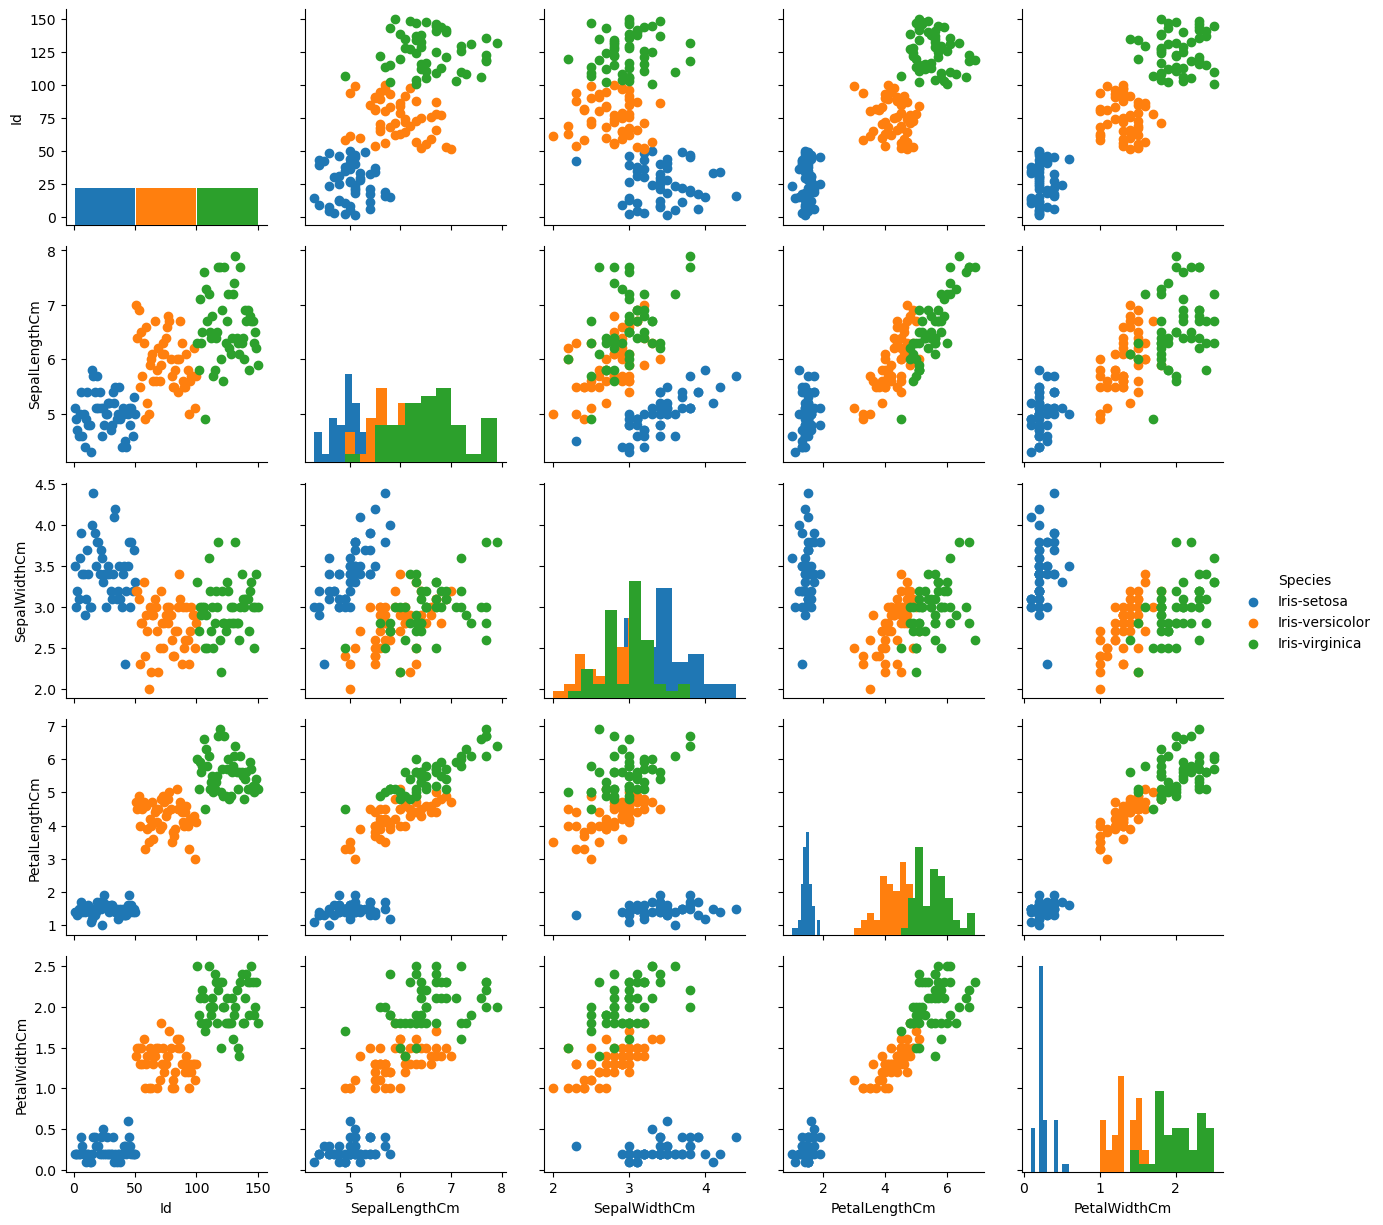

In [15]:
graph = sns.PairGrid(iris_df, hue = "Species")
graph = graph.map_diag(plt.hist)
graph = graph.map_offdiag(plt.scatter)
graph = graph.add_legend()
plt.show()

<h3>Splitting The Dataset For Traning and Testing</h3>

In [16]:
X = iris_df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y = iris_df["Species"]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [18]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [19]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
52,6.9,3.1,4.9,1.5
133,6.3,2.8,5.1,1.5
85,6.0,3.4,4.5,1.6
95,5.7,3.0,4.2,1.2
...,...,...,...,...
37,4.9,3.1,1.5,0.1
58,6.6,2.9,4.6,1.3
25,5.0,3.0,1.6,0.2
53,5.5,2.3,4.0,1.3


In [20]:
Y_train

1          Iris-setosa
52     Iris-versicolor
133     Iris-virginica
85     Iris-versicolor
95     Iris-versicolor
            ...       
37         Iris-setosa
58     Iris-versicolor
25         Iris-setosa
53     Iris-versicolor
29         Iris-setosa
Name: Species, Length: 120, dtype: object

In [21]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
41,4.5,2.3,1.3,0.3
134,6.1,2.6,5.6,1.4
113,5.7,2.5,5.0,2.0
20,5.4,3.4,1.7,0.2
145,6.7,3.0,5.2,2.3
97,6.2,2.9,4.3,1.3
65,6.7,3.1,4.4,1.4
121,5.6,2.8,4.9,2.0
101,5.8,2.7,5.1,1.9
9,4.9,3.1,1.5,0.1


In [22]:
Y_test

41         Iris-setosa
134     Iris-virginica
113     Iris-virginica
20         Iris-setosa
145     Iris-virginica
97     Iris-versicolor
65     Iris-versicolor
121     Iris-virginica
101     Iris-virginica
9          Iris-setosa
60     Iris-versicolor
62     Iris-versicolor
92     Iris-versicolor
104     Iris-virginica
127     Iris-virginica
17         Iris-setosa
26         Iris-setosa
49         Iris-setosa
103     Iris-virginica
88     Iris-versicolor
2          Iris-setosa
149     Iris-virginica
40         Iris-setosa
16         Iris-setosa
82     Iris-versicolor
74     Iris-versicolor
36         Iris-setosa
110     Iris-virginica
148     Iris-virginica
126     Iris-virginica
Name: Species, dtype: object

<h3>SUPPORT VECTOR CLASSIFIER</h3>

In [23]:
from sklearn.svm import SVC
svc_model = SVC().fit(X_train, Y_train)

In [24]:
predictions = svc_model.predict(X)
df = {"Actual":Y,"Predicted":predictions}
pd.DataFrame(df)

,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [25]:
y_hat = svc_model.predict(X_test)

In [26]:
#Classification Report Using SVC model
print("\t\t  CLASSIFICATION REPORT")
print("="*64)
print(classification_report(Y_test, y_hat))
print("="*64)

		  CLASSIFICATION REPORT
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.67      1.00      0.80         8
 Iris-virginica       1.00      0.67      0.80        12

       accuracy                           0.87        30
      macro avg       0.89      0.89      0.87        30
   weighted avg       0.91      0.87      0.87        30



Confusion Matrix
 [[10  0  0]
 [ 0  8  0]
 [ 0  4  8]]


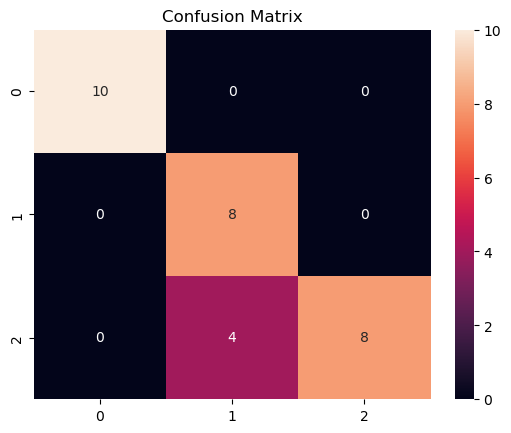

In [27]:
#Confusion Matrix Using SVC model
cm = confusion_matrix(Y_test, y_hat)
print("Confusion Matrix\n", cm)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()

<h3>Accuracy of the SVC model</h3>

In [28]:
print("Accuracy Of the Support Vector Classifier Model\n",accuracy_score(Y_test, y_hat)*100,'%')

Accuracy Of the Support Vector Classifier Model
 86.66666666666667 %


<h3>LOGISTIC REGRESSION MODEL FOR CLASSIFICATION</h3>

In [29]:
lgmodel = LogisticRegression()
lgmodel.fit(X_train, Y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
pred = lgmodel.predict(X)
pd.DataFrame({"Actual":Y, "Predictions":pred})

,Actual,Predictions
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
...,...,...
145,Iris-virginica,Iris-virginica
146,Iris-virginica,Iris-virginica
147,Iris-virginica,Iris-virginica
148,Iris-virginica,Iris-virginica


In [31]:
y_hat1 = lgmodel.predict(X_test)

In [32]:
#Classification Report Using Logistic Regression model
print("\t\t  Classification Report")
print("="*64)
print(classification_report(Y_test, y_hat1))
print("="*64)

		  Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Confusion Matrix
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


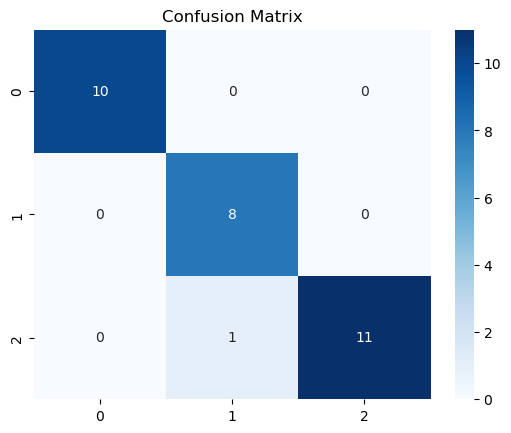

In [33]:
#Confusion Matrix using Logistic Regression model
cn = confusion_matrix(Y_test, y_hat1)
print("Confusion Matrix\n", cn)
sns.heatmap(cn, cmap = "Blues", annot=True)
plt.title("Confusion Matrix")
plt.show()

<h3>Accuracy of the LG model</h3>

In [34]:
print("Accuarcy Of The Logistic Regression Model:\n", accuracy_score(Y_test, y_hat1)*100, "%")

Accuarcy Of The Logistic Regression Model:
 96.66666666666667 %
